# User Analytics in the Telecommunication Industry

## Task 1: User Overview analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.precision',9)

In [2]:
df = pd.read_excel('Week2_challenge_data_source.xlsx')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014481e+14,33664962239.0,3.552120951e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019092e+14,33681854413.0,3.579400901e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003145e+14,33760627129.0,3.528151036e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014023e+14,33750343200.0,3.535661016e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014014e+14,33699795932.0,3.540700975e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
df.columns 

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


### Top Ten handsets used by Customers

In [4]:
df.groupby('Handset Type')['MSISDN/Number'].count().nlargest(10)

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Name: MSISDN/Number, dtype: int64

### Top Three handest Manufacturers

In [5]:
top3M = df.groupby('Handset Manufacturer')['Bearer Id'].count().nlargest(3)
top3M

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: Bearer Id, dtype: int64

### The top 5 handsets per handset manufacturer

In [6]:
def getFiveTop(toplist, df):
    topM = df.groupby('Handset Manufacturer')
    for key, value in toplist.items():
        print("Top Five devices for the Manufaturer " + key)
        print(topM.get_group(key).groupby('Handset Type')['Bearer Id'].count().nlargest(5))
        print("\n")

getFiveTop(top3M, df)

Top Five devices for the Manufaturer Apple
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Bearer Id, dtype: int64


Top Five devices for the Manufaturer Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Bearer Id, dtype: int64


Top Five devices for the Manufaturer Huawei
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Bearer Id, dtype: int64




## Task 1.1 Aggregating column data

### Total Number of xDR sessions

In [7]:
df3 = df[df['Bearer Id'].notna()]
seTxdr = df3.groupby('Bearer Id')['Dur. (ms)'].count().sort_values(ascending=False)[1:]
dfTotalXdr = pd.DataFrame({'Bearer Id': seTxdr.index, 'Total Number of xDR sessions': seTxdr.values})
dfTotalXdr

,Bearer Id,Total Number of xDR sessions
0,13042425979269199872,16
1,13042425965944199168,10
2,13042425972278300672,9
3,13042425981873399808,9
4,13042425974582800384,9
...,...,...
134703,13042425960981700608,1
134704,13042425960981999616,1
134705,13042425960982099968,1
134706,13042425960982999040,1


### Total session duration in Microseconds

In [8]:
seDxdr = df3.groupby('Bearer Id')['Dur. (ms)'].agg('sum').sort_values(ascending=False)[1:]
dfDur = pd.DataFrame({'Bearer Id': seDxdr.index, 'Total Duration (ms)': seDxdr.values})
dfDur

,Bearer Id,Total Duration (ms)
0,13114483561758900224,5659733.0
1,13042425972205000704,4838428.0
2,13042425978965499904,3990246.0
3,13042425975793299456,3667444.0
4,13042425981873399808,2863468.0
...,...,...
134703,7277825656116110336,7284.0
134704,6917537685489510400,7267.0
134705,6917537673690099712,7258.0
134706,6917537669513839616,7146.0


### Total Download Data in Bytes

In [9]:
df2 = df
df2 = df2[df2['MSISDN/Number'].notna()]
df2['MSISDN/Number'] = df2['MSISDN/Number'].apply(np.int64)
seSDown = df2.groupby('MSISDN/Number')['Total DL (Bytes)'].agg('sum').sort_values(ascending=False)[1:]
dfDown = pd.DataFrame({'MSISDN/Number': seSDown.index, 'Total Download Data (Bytes)': seSDown.values})
dfDown


c:\users\gkkar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MSISDN/Number,Total Download Data (Bytes)
0,33760536639,7811295382.0
1,33625779332,7770043342.0
2,33675877202,7309541816.0
3,33626320676,7301516540.0
4,33659725664,7081602462.0
...,...,...
106850,33666684512,9455608.0
106851,33760578459,9275626.0
106852,33658797043,9199518.0
106853,33659200818,9046209.0


### Total Upload data in Bytes 

In [10]:
seSUp = df2.groupby('MSISDN/Number')['Total UL (Bytes)'].agg('sum').sort_values(ascending=False)
dfUp = pd.DataFrame({'MSISDN/Number': seSUp.index, 'Total Uploaded Data (Bytes)': seSUp.values})
dfUp

,MSISDN/Number,Total Uploaded Data (Bytes)
0,33625779332,729577380.0
1,33760536639,703478581.0
2,33614892860,689483001.0
3,33626320676,669650721.0
4,33659725664,624260321.0
...,...,...
106851,33661893084,5921981.0
106852,33669429697,5461287.0
106853,33659052775,5276726.0
106854,33664682771,4338786.0


### Total Data volume for the  for each application

In [11]:
dfApps = df2.loc[:, 'Social Media DL (Bytes)': 'Other UL (Bytes)']
dfApps = dfApps.apply(lambda x : x.fillna(x.mean()), axis=0)

apps = ["Social Media", "Google", "Email", "Youtube", "Netflix", "Gaming", "Other"]

for item in apps:
    down = item + " DL (Bytes)"
    up = item + " UL (Bytes)"
    total = "Total Data " + item
    dfApps[total] = dfApps[down] + dfApps[up]

dfAppsTotal = dfApps.loc[:, 'Total Data Social Media': 'Total Data Other']
dfAppsTotal['MSISDN/Number'] = df2["MSISDN/Number"]

def aggTotalDataEach(dataf, col):
    s = dataf.groupby('MSISDN/Number')[col].agg('sum').sort_values(ascending=False)
    df = pd.DataFrame({'MSISDN/Number': s.index, col: s.values})
    return df

dfSm = aggTotalDataEach(dfAppsTotal, 'Total Data Social Media')
dfGo = aggTotalDataEach(dfAppsTotal, 'Total Data Google')
dfEm = aggTotalDataEach(dfAppsTotal, 'Total Data Email')
dfYo = aggTotalDataEach(dfAppsTotal, 'Total Data Youtube')
dfNe = aggTotalDataEach(dfAppsTotal, 'Total Data Netflix')
dfGa = aggTotalDataEach(dfAppsTotal, 'Total Data Gaming')
dfOt = aggTotalDataEach(dfAppsTotal, 'Total Data Other')

#### Total Data Volume Social Media

In [12]:
dfSm

,MSISDN/Number,Total Data Social Media
0,33626320676,43374779.0
1,33760536639,39783189.0
2,33659725664,35412358.0
3,33614892860,28294544.0
4,33625779332,27135500.0
...,...,...
106851,33762201799,7503.0
106852,33760490061,7382.0
106853,33668248171,4469.0
106854,33659843938,2003.0


#### Total Data Volume Google

In [13]:
dfGo

,MSISDN/Number,Total Data Google
0,33626320676,152191852.0
1,33625779332,142307915.0
2,33614892860,127973787.0
3,33760536639,123223099.0
4,33659725664,116516345.0
...,...,...
106851,33761321476,112674.0
106852,33669526270,112590.0
106853,33674088978,99826.0
106854,33698001031,89856.0


#### Total Data Volume Email

In [14]:
dfEm

,MSISDN/Number,Total Data Email
0,33626320676,42418782.0
1,33614892860,40788634.0
2,33625779332,40633966.0
3,33786323068,36310123.0
4,33659725664,35999792.0
...,...,...
106851,33664898641,29451.0
106852,33675896712,27503.0
106853,33644791426,26116.0
106854,33652039542,26087.0


#### Total Data Volume Yotube

In [15]:
dfYo

,MSISDN/Number,Total Data Youtube
0,33625779332,452958769.0
1,33760536639,396289198.0
2,33614892860,394370218.0
3,33626320676,374483047.0
4,33675877202,317410572.0
...,...,...
106851,33699704781,239357.0
106852,33768483944,226562.0
106853,33648091896,207955.0
106854,33669488505,157446.0


#### Total Data Volume Netflix

In [16]:
dfNe

,MSISDN/Number,Total Data Netflix
0,33659725664,399519079.0
1,33614892860,361401046.0
2,33625779332,356980607.0
3,33760536639,334643269.0
4,33626320676,328725740.0
...,...,...
106851,33698486515,284133.0
106852,33698533842,260252.0
106853,33667489726,248628.0
106854,33615884686,201564.0


#### Total Data Volume Gaming

In [17]:
dfGa

,MSISDN/Number,Total Data Gaming
0,33614892860,7749432234.0
1,33760536639,7461045228.0
2,33625779332,7326673487.0
3,33675877202,6970567597.0
4,33626320676,6887572116.0
...,...,...
106851,33698056654,1180903.0
106852,33698080559,939116.0
106853,33769596346,690038.0
106854,33682310624,595375.0


#### Total Data Volume Other

In [18]:
dfOt

,MSISDN/Number,Total Data Other
0,33626320676,8167877776.0
1,33614892860,7639263572.0
2,33675877202,6798515150.0
3,33625779332,6354583086.0
4,33603127838,6326670874.0
...,...,...
106851,33663539547,1130046.0
106852,33626033383,1127863.0
106853,33761590308,972727.0
106854,33633594222,511769.0


# Interim Submission

## univariate analysis

### Total Number of xDR sessions

In [19]:
dfTotalXdr.describe()

,Total Number of xDR sessions
count,134708.000000000
mean,1.106170383
std,0.385198611
min,1.000000000
25%,1.000000000
50%,1.000000000
75%,1.000000000
max,16.000000000


###  	Total Duration (ms)

In [20]:
dfDur.describe()

,Total Duration (ms)
count,1.347080000e+05
mean,1.161104899e+05
std,9.982828103e+04
min,7.142000000e+03
25%,6.008050000e+04
50%,8.640000000e+04
75%,1.530890000e+05
max,5.659733000e+06


### Total Download Data (Bytes)

In [21]:
dfDown["Total Download Data (Bytes)"].describe()

count    1.068550000e+05
mean     6.335822762e+08
std      4.639867989e+08
min      8.827082000e+06
25%      3.148239395e+08
50%      5.703641900e+08
75%      8.073558785e+08
max      7.811295382e+09
Name: Total Download Data (Bytes), dtype: float64

### Total Uploaded Data (Bytes)

In [22]:
dfUp["Total Uploaded Data (Bytes)"].describe()

count    1.068560000e+05
mean     5.730942241e+07
std      3.565764975e+07
min      2.866892000e+06
25%      3.639547475e+07
50%      4.679386550e+07
75%      6.573199300e+07
max      7.295773800e+08
Name: Total Uploaded Data (Bytes), dtype: float64

### Total Data Social Media

In [23]:
dfSm["Total Data Social Media"].describe()

count    1.068560000e+05
mean     2.547966816e+06
std      1.908038042e+06
min      1.563000000e+03
25%      1.211281500e+06
50%      2.303756000e+06
75%      3.307509000e+06
max      4.337477900e+07
Name: Total Data Social Media, dtype: float64

### Total Data Google

In [24]:
dfGo['Total Data Google'].describe()

count    1.068560000e+05
mean     1.088243442e+07
std      7.544861437e+06
min      4.033000000e+04
25%      5.942636000e+06
50%      9.586153000e+06
75%      1.321473975e+07
max      1.521918520e+08
Name: Total Data Google, dtype: float64

### Total Data Email

In [25]:
dfEm['Total Data Email'].describe()

count    1.068560000e+05
mean     3.148795811e+06
std      2.222400100e+06
min      1.817600000e+04
25%      1.674481000e+06
50%      2.799824500e+06
75%      3.847197500e+06
max      4.241878200e+07
Name: Total Data Email, dtype: float64

### Total Data Youtube

In [26]:
dfYo['Total Data Youtube'].describe()

count    1.068560000e+05
mean     3.155839928e+07
std      2.129491768e+07
min      7.890300000e+04
25%      1.863108850e+07
50%      2.680037600e+07
75%      3.792797575e+07
max      4.529587690e+08
Name: Total Data Youtube, dtype: float64

### Total Data Netflix

In [27]:
dfNe['Total Data Netflix'].describe()

count    1.068560000e+05
mean     3.153833231e+07
std      2.128955697e+07
min      1.845690000e+05
25%      1.855597275e+07
50%      2.671888950e+07
75%      3.797695700e+07
max      3.995190790e+08
Name: Total Data Netflix, dtype: float64

### Total Data Gaming

In [28]:
dfGa['Total Data Gaming'].describe()

count    1.068560000e+05
mean     5.997690107e+08
std      4.491504624e+08
min      3.063580000e+05
25%      2.880631125e+08
50%      5.423492065e+08
75%      7.773041380e+08
max      7.749432234e+09
Name: Total Data Gaming, dtype: float64

### Total Data Other

# Graphical Univariate & Bivariate  Analysis

### Total Number of xDR sessions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218124E3D68>]],
      dtype=object)

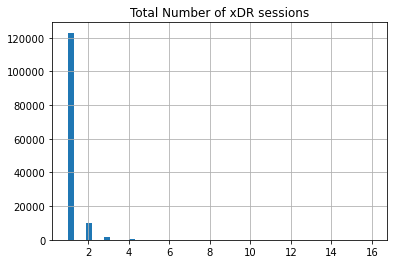

In [29]:
dfTotalXdr.hist(bins=50)

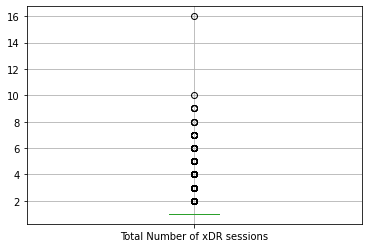

In [30]:
dfTotalXdr.boxplot()

###  	Total Duration (ms)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021810D73EF0>]],
      dtype=object)

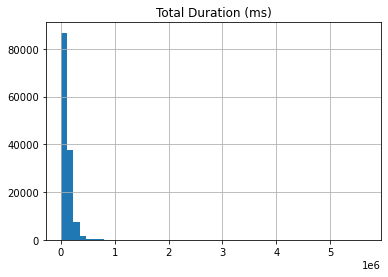

In [31]:
dfDur.hist(bins=50)

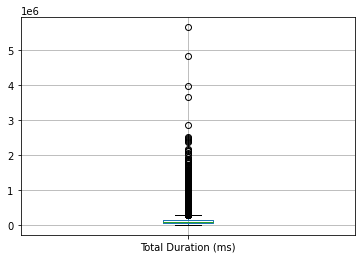

In [32]:
dfDur.boxplot()

### Total Download Data (Bytes)

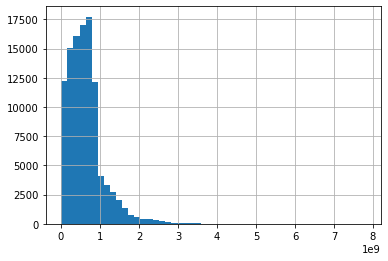

In [33]:
dfDown["Total Download Data (Bytes)"].hist(bins=50)

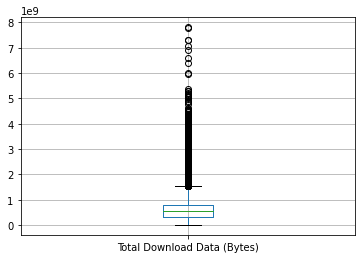

In [34]:
dfDown.boxplot(column = 'Total Download Data (Bytes)')

### Total Uploaded Data (Bytes)

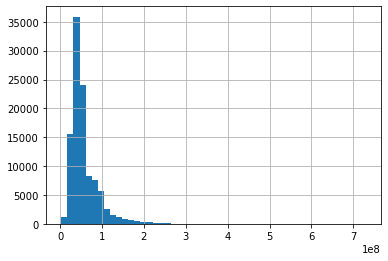

In [35]:
dfUp["Total Uploaded Data (Bytes)"].hist(bins=50)

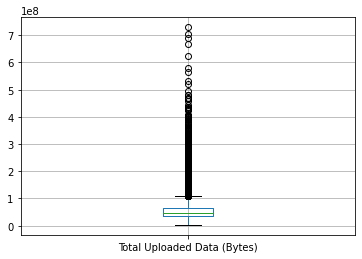

In [36]:
dfUp.boxplot(column="Total Uploaded Data (Bytes)")

### Total Data Social Media

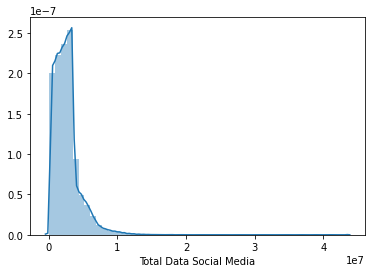

In [37]:
# dfSm["Total Data Social Media"].hist(bins=50)
sns.distplot(dfSm['Total Data Social Media'])

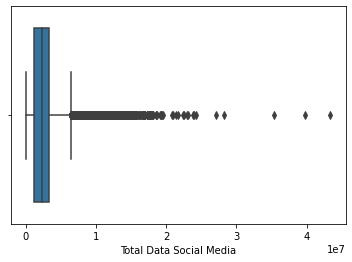

In [38]:
# dfSm.boxplot(column="Total Data Social Media")
sns.boxplot(dfSm['Total Data Social Media'])

### Total Data Google

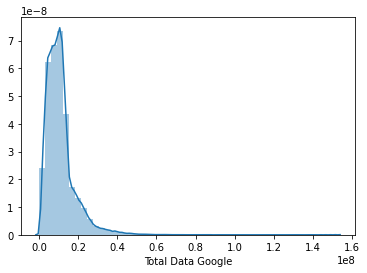

In [39]:
# dfGo['Total Data Google'].hist(bins=50)
sns.distplot(dfGo['Total Data Google'])

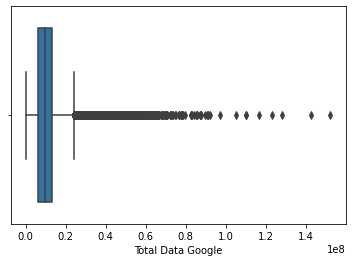

In [40]:
# dfGo.boxplot(column='Total Data Google')
sns.boxplot(dfGo['Total Data Google'])

### Total Data Email

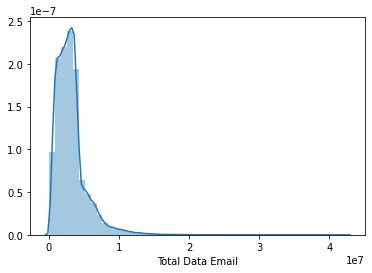

In [41]:
# dfEm['Total Data Email'].hist(bins=50)
sns.distplot(dfEm['Total Data Email'])

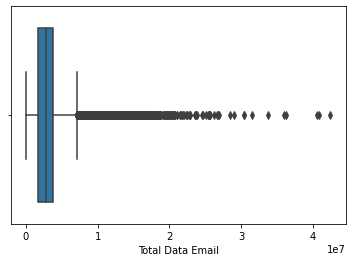

In [42]:
# dfEm.boxplot(column='Total Data Email')
sns.boxplot(dfEm['Total Data Email'])

### Total Data Youtube

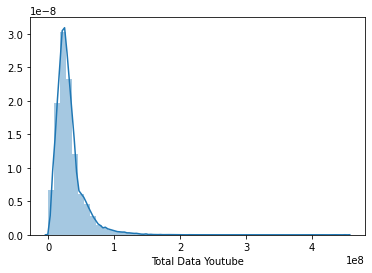

In [43]:
# dfYo['Total Data Youtube'].hist(bins=50)
sns.distplot(dfYo['Total Data Youtube'])

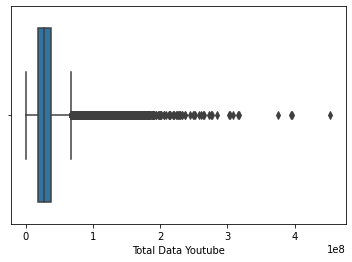

In [44]:
# dfYo.boxplot(column='Total Data Youtube')
sns.boxplot(dfYo['Total Data Youtube'])

### Total Data Netflix

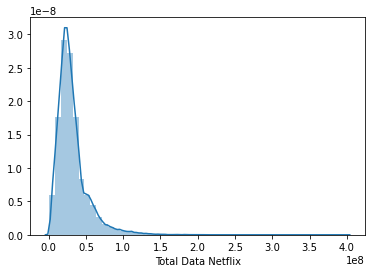

In [45]:
# dfNe['Total Data Netflix'].hist(bins=50)
sns.distplot(dfNe['Total Data Netflix'])

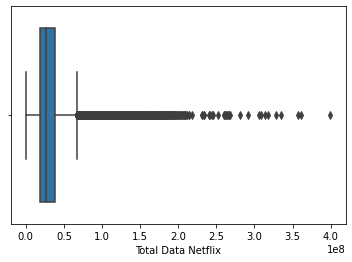

In [46]:
# dfNe.boxplot(column='Total Data Netflix')
sns.boxplot(dfNe['Total Data Netflix'])

### Total Data Gaming

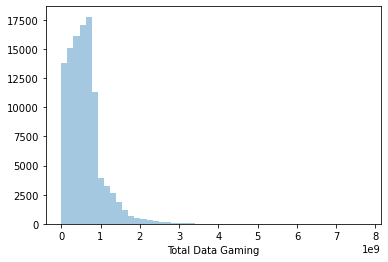

In [47]:
# dfGa['Total Data Gaming'].hist(bins=50)
sns.distplot(dfGa['Total Data Gaming'], kde=False)

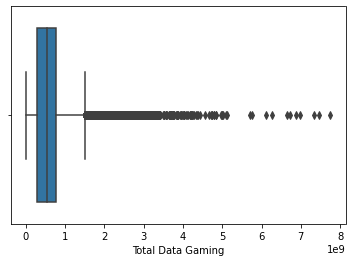

In [48]:
# dfGa.boxplot(column='Total Data Gaming')
sns.boxplot(dfGa['Total Data Gaming'])

### Total Data Other

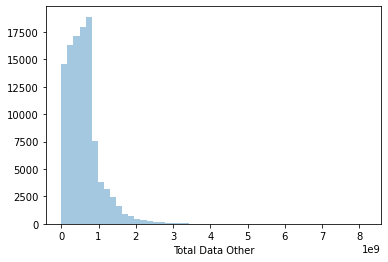

In [49]:
# dfOt['Total Data Other'].hist(bins=50)
sns.distplot(dfOt['Total Data Other'], kde=False)

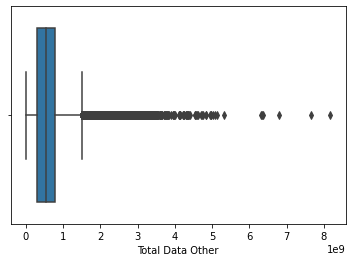

In [50]:
# dfOt.boxplot(column='Total Data Other')
sns.boxplot(x=dfOt['Total Data Other'])

### Variable Transformation

In [51]:
# Dropping the columns that are identifiers and not of type Int
dfNan = df3.drop(['Bearer Id', 'IMSI', 'MSISDN/Number','IMEI','Start', 'End', 'Last Location Name',
          'Handset Manufacturer', 'Handset Type'], axis=1)
# Filling the nan values with the mean of that column
dfNan = dfNan.apply(lambda x : x.fillna(x.mean()), axis=0)
cols = dfNan.columns.to_list()
for col in cols:
    df3[col] = dfNan[col]

In [52]:
# Segmenting into 5 deciles groups 
dfDxdr = df3.groupby('Bearer Id').agg('sum')
deciles = pd.qcut(dfDxdr['Dur. (ms)'], 5).values.codes
dfDxdr['deciles'] = deciles

In [53]:
#Computing the Total Data in each Decile Group
dfDxdr['Total Data'] = dfDxdr['Total UL (Bytes)'] + dfDxdr['Total DL (Bytes)']
dfDxdr.groupby('deciles')['Total Data'].sum()

deciles
0    1.384439238e+13
1    1.881200017e+13
2    8.618751528e+12
3    1.404230878e+13
4    1.904773836e+13
Name: Total Data, dtype: float64

### Correlation Matrix

In [54]:
#Getting the variable correlation Matrix
dfAppsTotal.corr(method="pearson")

,Total Data Social Media,Total Data Google,Total Data Email,Total Data Youtube,Total Data Netflix,Total Data Gaming,Total Data Other,MSISDN/Number
Total Data Social Media,1.000000000,-0.001854767,0.004121803,0.000677292,0.001420754,0.001386754,0.005849199,-0.001834714
Total Data Google,-0.001854767,1.000000000,-0.000287685,0.002542071,-0.001911094,-0.000948950,-0.001904419,0.001509232
Total Data Email,0.004121803,-0.000287685,1.000000000,-0.003232960,0.001286868,-0.000513061,-0.001034390,0.003330695
Total Data Youtube,0.000677292,0.002542071,-0.003232960,1.000000000,0.003194428,-0.003117644,0.003197871,0.006189000
Total Data Netflix,0.001420754,-0.001911094,0.001286868,0.003194428,1.000000000,-0.003091629,-0.008791003,0.002455634
Total Data Gaming,0.001386754,-0.000948950,-0.000513061,-0.003117644,-0.003091629,1.000000000,-0.002789205,-0.003547991
Total Data Other,0.005849199,-0.001904419,-0.001034390,0.003197871,-0.008791003,-0.002789205,1.000000000,-0.001342522
MSISDN/Number,-0.001834714,0.001509232,0.003330695,0.006189000,0.002455634,-0.003547991,-0.001342522,1.000000000


### Dimensionality Reduction (PCA)

In [55]:
# Reducing the Dimensions of the Data to 2D using PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dfNoStr = df3.drop(['Start', 'End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type', 'Bearer Id'], axis=1)
dfNoStr = dfNoStr.dropna()
pca.fit(dfNoStr)
transformed = pca.transform(dfNoStr)

In [56]:
pca.explained_variance_ratio_

array([0.98823222, 0.01176752])

# Task 2 - User Engagement analysis

### Aggregating engagement metrics

In [57]:
# How many times the users have had a session (Top 10)
df2.groupby('MSISDN/Number')['Dur. (ms)'].count().nlargest(10)

MSISDN/Number
33626320676    18
33614892860    17
33625779332    17
33659725664    16
33675877202    15
33760536639    15
33667163239    13
33603127838    12
33604515716    12
33627080969    12
Name: Dur. (ms), dtype: int64

In [58]:
#Getting the top users with the most time spent on the sessions (Top 10)
df2.groupby('MSISDN/Number')['Dur. (ms)'].agg('sum').nlargest(10)

MSISDN/Number
33625779332    18553754.0
33614892860     9966898.0
33760536639     9279434.0
33626320676     8791927.0
33667163239     8744914.0
33662840755     6614270.0
33664693736     6288730.0
33603127838     6287761.0
33667456716     5649882.0
33760413819     5321667.0
Name: Dur. (ms), dtype: float64

In [59]:
# Getting 10 highest users with the most total traffic
df2['Total traffic'] = df2['Total DL (Bytes)'] + df2['Total UL (Bytes)']
df2.groupby('MSISDN/Number')['Total traffic'].agg('sum').nlargest(10)

c:\users\gkkar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


MSISDN/Number
33614892860    8846226494.0
33760536639    8514773963.0
33625779332    8499620722.0
33626320676    7971167261.0
33675877202    7891110608.0
33659725664    7705862783.0
33666464084    7308500938.0
33760413819    7132370514.0
33664712899    6872018208.0
33698792269    6540899126.0
Name: Total traffic, dtype: float64

### Normalizing the engagement metrics and K-means

In [60]:
# Preparing the data for Kmeans i.e getting the columns we want
dfMsDur = aggTotalDataEach(df2, 'Dur. (ms)')
dfMTt = aggTotalDataEach(df2, 'Total traffic')
dfEM = pd.merge(dfMsDur, dfMTt, on='MSISDN/Number')

sDur = df2.groupby('MSISDN/Number')['Dur. (ms)'].count().sort_values(ascending=False)
dfSDur = pd.DataFrame({'MSISDN/Number': sDur.index, 'sessions frequency': sDur.values})

dfEM = pd.merge(dfEM, dfSDur, on='MSISDN/Number')
dfNom = dfEM.drop('MSISDN/Number', axis=1)
dfNNom = dfEM.drop('MSISDN/Number', axis=1)
dfNNom

,Dur. (ms),Total traffic,sessions frequency
0,18553754.0,8499620722.0,17
1,9966898.0,8846226494.0,17
2,9279434.0,8514773963.0,15
3,8791927.0,7971167261.0,18
4,8744914.0,5618394054.0,13
...,...,...,...
106851,7267.0,208893702.0,1
106852,7258.0,836659601.0,1
106853,7189.0,279804529.0,1
106854,7146.0,678517390.0,1


In [61]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

# Normalizing the Duration and Total traffic columns
dfNom['Dur. (ms)'] = np.transpose(normalize([np.array(dfNom['Dur. (ms)'])]))
dfNom['Total traffic'] = np.transpose(normalize([np.array(dfNom['Total traffic'])]))

# Kmeans clustering on the normalized data
kmeans = KMeans(n_clusters=3, random_state=0).fit(dfNom)

In [62]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [63]:
# cluster Centers of each cluster
kmeans.cluster_centers_

array([[1.33739906e-03, 1.79362238e-03, 1.00000000e+00],
       [8.13972094e-03, 8.24225288e-03, 4.62442325e+00],
       [2.75642855e-03, 3.87407852e-03, 2.17090516e+00]])

In [64]:
# Appending the labels to the data that has not been normalized
dfNNom['kmeansLabels'] = np.transpose(kmeans.labels_)
dfNNom

,Dur. (ms),Total traffic,sessions frequency,kmeansLabels
0,18553754.0,8499620722.0,17,1
1,9966898.0,8846226494.0,17,1
2,9279434.0,8514773963.0,15,1
3,8791927.0,7971167261.0,18,1
4,8744914.0,5618394054.0,13,1
...,...,...,...,...
106851,7267.0,208893702.0,1,0
106852,7258.0,836659601.0,1,0
106853,7189.0,279804529.0,1,0
106854,7146.0,678517390.0,1,0


### the minimum, maximum, average & total non- normalized metrics for each cluster

In [65]:
# finding the max values of each cluster
dfNNom.groupby('kmeansLabels').max()

,Dur. (ms),Total traffic,sessions frequency
kmeansLabels,,,
0,1573420.0,950760661.0,1
1,18553754.0,8846226494.0,18
2,3174824.0,2679130626.0,3


In [66]:
# finding the min values of each cluster
dfNNom.groupby('kmeansLabels').min()

,Dur. (ms),Total traffic,sessions frequency
kmeansLabels,,,
0,7142.0,33249009.0,1
1,46896.0,474595196.0,4
2,18235.0,119768539.0,2


In [67]:
# finding the mean values of each cluster
dfNNom.groupby('kmeansLabels').mean()

,Dur. (ms),Total traffic,sessions frequency
kmeansLabels,,,
0,103542.568138838,4.970071918e+08,1.000000000
1,630184.089510920,2.283902674e+09,4.624423254
2,213405.032735565,1.073495126e+09,2.170905156


In [68]:
# finding the Total values of each cluster
dfNNom.groupby('kmeansLabels').sum()

,Dur. (ms),Total traffic,sessions frequency
kmeansLabels,,,
0,8048467364.0,3.863286602e+13,77731
1,2048728475.0,7.424967594e+12,15034
2,5521641817.0,2.777561289e+13,56170


### the top 10 most engaged users per application

In [69]:
# Top 10 users engaged on social media
dfSm.head(10)

,MSISDN/Number,Total Data Social Media
0,33626320676,43374779.0
1,33760536639,39783189.0
2,33659725664,35412358.0
3,33614892860,28294544.0
4,33625779332,27135500.0
5,33667163239,24247850.0
6,33786323068,23974919.0
7,33669068942,23800834.0
8,33603127838,23077825.0
9,33658490784,23000066.0


In [70]:
# Top 10 users engaged on Google
dfGo.head(10)

,MSISDN/Number,Total Data Google
0,33626320676,152191852.0
1,33625779332,142307915.0
2,33614892860,127973787.0
3,33760536639,123223099.0
4,33659725664,116516345.0
5,33786323068,110254484.0
6,33675877202,109860502.0
7,33667163239,105032696.0
8,33761268199,97089988.0
9,33698756430,91935151.0


In [71]:
# Top 10 users engaged on Email
dfEm.head(10)

,MSISDN/Number,Total Data Email
0,33626320676,42418782.0
1,33614892860,40788634.0
2,33625779332,40633966.0
3,33786323068,36310123.0
4,33659725664,35999792.0
5,33760536639,33693767.0
6,33675877202,31514421.0
7,33665460546,30417885.0
8,33667163239,30335796.0
9,33698792269,29059042.0


In [72]:
# Top 10 users engaged on Youtube
dfYo.head(10)

,MSISDN/Number,Total Data Youtube
0,33625779332,452958769.0
1,33760536639,396289198.0
2,33614892860,394370218.0
3,33626320676,374483047.0
4,33675877202,317410572.0
5,33667163239,315231310.0
6,33627080969,308790774.0
7,33760413819,303169107.0
8,33698792269,302661958.0
9,33603127838,284090139.0


In [73]:
# Top 10 users engaged in Gaming
dfGa.head(10)

,MSISDN/Number,Total Data Gaming
0,33614892860,7749432234.0
1,33760536639,7461045228.0
2,33625779332,7326673487.0
3,33675877202,6970567597.0
4,33626320676,6887572116.0
5,33659725664,6725559211.0
6,33666464084,6646303338.0
7,33760413819,6268619592.0
8,33664712899,6103856008.0
9,33698792269,5753743069.0


In [74]:
# Top 10 users engaged in other applications
dfOt.head(10)

,MSISDN/Number,Total Data Other
0,33626320676,8167877776.0
1,33614892860,7639263572.0
2,33675877202,6798515150.0
3,33625779332,6354583086.0
4,33603127838,6326670874.0
5,33659725664,6317415487.0
6,33626948251,5305447882.0
7,33627080969,5117790890.0
8,33761268199,5077779438.0
9,33658361927,5013650844.0


In [75]:
# Top 10 users engaged on Netflix
dfNe.head(10)

,MSISDN/Number,Total Data Netflix
0,33659725664,399519079.0
1,33614892860,361401046.0
2,33625779332,356980607.0
3,33760536639,334643269.0
4,33626320676,328725740.0
5,33760413819,318347546.0
6,33667163239,313939488.0
7,33675877202,309093159.0
8,33786323068,305939790.0
9,33761268199,292091341.0


### plot the top 3 most used applications

In [76]:
# Creating a dataframe of all the aggregated application data
dfAppsAgg = pd.merge(dfSm, dfGo, on='MSISDN/Number')
dfAppsAgg = pd.merge(dfAppsAgg, dfEm, on='MSISDN/Number')
dfAppsAgg = pd.merge(dfAppsAgg, dfYo, on='MSISDN/Number')
dfAppsAgg = pd.merge(dfAppsAgg, dfNe, on='MSISDN/Number')
dfAppsAgg = pd.merge(dfAppsAgg, dfGa, on='MSISDN/Number')
dfAppsAgg = pd.merge(dfAppsAgg, dfOt, on='MSISDN/Number')

In [77]:
# finding the top 3 applications  
top3 = dfAppsAgg.sum().nlargest(4)[1:]
dfTop3 = pd.DataFrame(top3).transpose()
dfTop3.head()

,Total Data Gaming,Total Data Other,Total Data Youtube
0,6.408891741e+13,6.395425252e+13,3.372204313e+12


Text(0.5, 1.0, 'Top Three Application data')

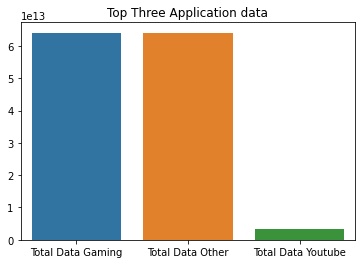

In [78]:
# Top 3 bar plot
sns.barplot(data=dfTop3).set_title('Top Three Application data')

[Text(0, 0, 'Social Media'),
 Text(0, 0, 'Google'),
 Text(0, 0, 'Email'),
 Text(0, 0, 'Youtube'),
 Text(0, 0, 'Netflix'),
 Text(0, 0, 'Gaming'),
 Text(0, 0, 'Other')]

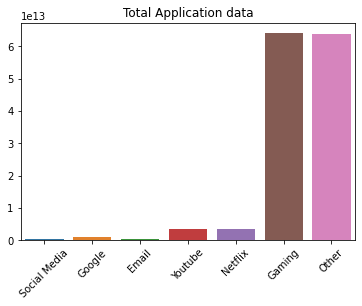

In [79]:
# All application total data graph
alles = dfAppsAgg.sum()[1:]
dfAlles = pd.DataFrame(alles).transpose()
# dfAlles.plot.bar(rot=40)
xTicks = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
chart = sns.barplot(data=dfAlles)
chart.set_title('Total Application data')
chart.set_xticklabels(xTicks, rotation=45)

###  k engagement clusters based on the engagement metrics

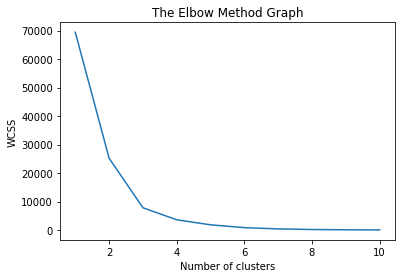

In [80]:
# Using the eblow method to find out the optimal number of cluters
wcss =  []

#this loop will fit the k-means algorithm to our data and second we will compute 
#the within cluster sum of squares and appended to our wcss list.
for k in range(1, 11):
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k,init='k-means++', random_state=0)
    kmeanModel.fit(dfNom)     
    
    # kmeans inertia_ attribute is:  Sum of squared distances of samples to their closest cluster center
    wcss.append(kmeanModel.inertia_)

# Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Task 3 Experience Analysis

In [81]:
# Creating data suitable for Experience Analysis
dfEA = df2.loc[:, 'Bearer Id':'TCP UL Retrans. Vol (Bytes)']
dfEA = dfEA.drop(['Bearer Id','Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name'], axis=1)

# removing the null values in the data
dfEA= dfEA.apply(lambda x: x.fillna(x.mean()), axis=0)
dfEA['MSISDN/Number'] = df2['MSISDN/Number']

In [82]:
# Summing the Uploads and Downloads columns to get the Total data columns
dfEA['Avg RTT'] = dfEA['Avg RTT DL (ms)'] + dfEA['Avg RTT UL (ms)']
dfEA['Avg Bearer TP (MegaBytes)'] = dfEA['Avg Bearer TP DL (kbps)'] + dfEA['Avg Bearer TP UL (kbps)']
dfEA['TCP Retrans. Vol (MegaBytes)'] = dfEA['TCP DL Retrans. Vol (Bytes)'] + dfEA['TCP UL Retrans. Vol (Bytes)']

# Turning the Data columns into MegaBytes
dfEA['Avg Bearer TP (MegaBytes)'] = dfEA['Avg Bearer TP (MegaBytes)'] / 1000
dfEA['TCP Retrans. Vol (MegaBytes)'] = dfEA['TCP Retrans. Vol (MegaBytes)']/1000000
dfEA = dfEA.loc[:, 'MSISDN/Number':'TCP Retrans. Vol (MegaBytes)']

In [83]:
# aggregating the Users
dfEA['Handset Type'] = df2['Handset Type']
dfEA.groupby('MSISDN/Number').agg('sum')

,Avg RTT,Avg Bearer TP (MegaBytes),TCP Retrans. Vol (MegaBytes)
MSISDN/Number,,,
33601001722,46.000000000,0.076,21.650430771
33601001754,31.000000000,0.099,21.650430771
33601002511,125.861975683,0.097,21.650430771
33601007832,84.000000000,0.248,0.767313496
33601008617,119.000000000,56.844,31.021262771
...,...,...,...
33789996170,52.000000000,10.365,0.218045000
33789997247,40.000000000,0.116,21.650430771
3197020876596,125.861975683,0.001,21.650430771


### 10 of the top, bottom and most frequent

In [84]:
# Top 10 Average RTT
dfEA.groupby('MSISDN/Number')['Avg RTT'].sum().sort_values(ascending=False)[:10]

MSISDN/Number
33662317023    96924.0
33660874265    64670.0
33683692867    54848.0
33698551167    46021.0
33761813523    37084.0
33668791629    36304.0
33760941100    27278.0
33606788933    26300.0
33671816754    25715.0
33781865588    25388.0
Name: Avg RTT, dtype: float64

In [85]:
# Top 10 users with the Most Avg RTT
dfEA.groupby('MSISDN/Number')['Avg RTT'].count().sort_values(ascending=False)[:10]

MSISDN/Number
33626320676    18
33614892860    17
33625779332    17
33659725664    16
33675877202    15
33760536639    15
33667163239    13
33627080969    12
33760413819    12
33786323068    12
Name: Avg RTT, dtype: int64

In [86]:
# The bottom 10 Avg RTT users 
dfEA.groupby('MSISDN/Number')['Avg RTT'].sum().sort_values(ascending=False)[-10:]

MSISDN/Number
33634684770    10.0
33610846366     9.0
33672196893     9.0
33647679481     8.0
33668619895     6.0
33659493541     5.0
33695045499     4.0
33660204450     2.0
33652982188     0.0
33661575382     0.0
Name: Avg RTT, dtype: float64

In [87]:
# Top 10 Avg Bearers
dfEA.groupby('MSISDN/Number')['Avg Bearer TP (MegaBytes)'].sum().sort_values(ascending=False)[:10]

MSISDN/Number
33762333464    902.222
33668708263    840.424
33659546392    798.342
33669946573    690.815
33668425947    676.858
33698174760    618.797
33625700673    564.179
33658075438    550.352
33762644658    549.661
33665658364    530.353
Name: Avg Bearer TP (MegaBytes), dtype: float64

In [88]:
# Bottom 10 Avg Bearer TP users
dfEA.groupby('MSISDN/Number')['Avg Bearer TP (MegaBytes)'].sum().sort_values(ascending=False)[-10:]

MSISDN/Number
33660339983    0.0
33688862447    0.0
33659078720    0.0
33611523366    0.0
33698045169    0.0
33698591046    0.0
33659471143    0.0
33659337161    0.0
33610640063    0.0
33777761538    0.0
Name: Avg Bearer TP (MegaBytes), dtype: float64

In [89]:
# Top 10 users with the Most Avg Bearer TP
dfEA.groupby('MSISDN/Number')['Avg Bearer TP (MegaBytes)'].count().sort_values(ascending=False)[0:10]

MSISDN/Number
33626320676    18
33614892860    17
33625779332    17
33659725664    16
33675877202    15
33760536639    15
33667163239    13
33627080969    12
33760413819    12
33786323068    12
Name: Avg Bearer TP (MegaBytes), dtype: int64

In [90]:
# Top 10 TCP Retrans. Vol users
dfEA.groupby('MSISDN/Number')['TCP Retrans. Vol (MegaBytes)'].sum().sort_values(ascending=False)[0:10]

MSISDN/Number
33667725464    8354.209105000
33659084281    7941.860302000
33660977522    7374.905307496
33761284050    6043.978448000
33762644658    5879.989037000
33650658056    5593.366107000
33663180885    5566.928580000
33669054076    5195.865394771
33763572381    5179.458974000
33658638625    5165.856986000
Name: TCP Retrans. Vol (MegaBytes), dtype: float64

In [91]:
# Bottom 10 TCP Retrans. Vol users
dfEA.groupby('MSISDN/Number')['TCP Retrans. Vol (MegaBytes)'].sum().sort_values(ascending=False)[-10:]

MSISDN/Number
33699694715    0.000182
33679366089    0.000179
33784203839    0.000177
33650681239    0.000176
33769636458    0.000176
33607833304    0.000143
33626357513    0.000134
33762062356    0.000129
33614777138    0.000128
33650128412    0.000097
Name: TCP Retrans. Vol (MegaBytes), dtype: float64

In [92]:
# Top 10 users with the Most TCP Retrans. Vol
dfEA.groupby('MSISDN/Number')['TCP Retrans. Vol (MegaBytes)'].count().sort_values(ascending=False)[:10]

MSISDN/Number
33626320676    18
33614892860    17
33625779332    17
33659725664    16
33675877202    15
33760536639    15
33667163239    13
33627080969    12
33760413819    12
33786323068    12
Name: TCP Retrans. Vol (MegaBytes), dtype: int64

### distribution of the average throughput  per handset type

Text(0.5, 1.0, 'Average Throughput per handset type')

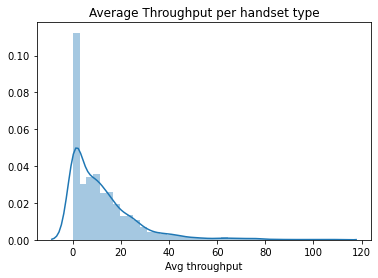

In [93]:
# Getting the Average throughput per handset type
avgThr = dfEA.groupby('Handset Type')['Avg Bearer TP (MegaBytes)'].mean()
dfAvgThr = pd.DataFrame({'Handset Type': avgThr.index, 'Avg throughput':avgThr.values})

# plotting the first 15 handset sinces the devices are too many to represent well
sns.distplot(dfAvgThr['Avg throughput']).set_title('Average Throughput per handset type')


[Text(0, 0, 'A-Link Telecom I. Cubot A5'),
 Text(0, 0, 'A-Link Telecom I. Cubot Note Plus'),
 Text(0, 0, 'A-Link Telecom I. Cubot Note S'),
 Text(0, 0, 'A-Link Telecom I. Cubot Nova'),
 Text(0, 0, 'A-Link Telecom I. Cubot Power'),
 Text(0, 0, 'A-Link Telecom I. Cubot R9'),
 Text(0, 0, 'A-Link Telecom I. Cubot X18 Plus'),
 Text(0, 0, 'Acer Liquid M220'),
 Text(0, 0, 'Acer Liquid Z220'),
 Text(0, 0, 'Acer Liquid Z530'),
 Text(0, 0, 'Acer Liquid Z630'),
 Text(0, 0, 'Acer Liquid Zest 4G'),
 Text(0, 0, 'Acer Liquid Zest Plus'),
 Text(0, 0, 'Acer M310'),
 Text(0, 0, 'Acer V370 Acer V370 Liquid E2 Duo'),
 Text(0, 0, 'Acer Zx Z130'),
 Text(0, 0, 'Adar Stanley Mobile S231'),
 Text(0, 0, 'Alif Communicati. Pulian Cm84'),
 Text(0, 0, 'Apple iPad (A1823)'),
 Text(0, 0, 'Apple iPad (A1954)'),
 Text(0, 0, 'Apple iPad 2 (A1396)'),
 Text(0, 0, 'Apple iPad 3 (A1430)'),
 Text(0, 0, 'Apple iPad 4 (A1460)'),
 Text(0, 0, 'Apple iPad Air (A1475)'),
 Text(0, 0, 'Apple iPad Air 2 (A1567)')]

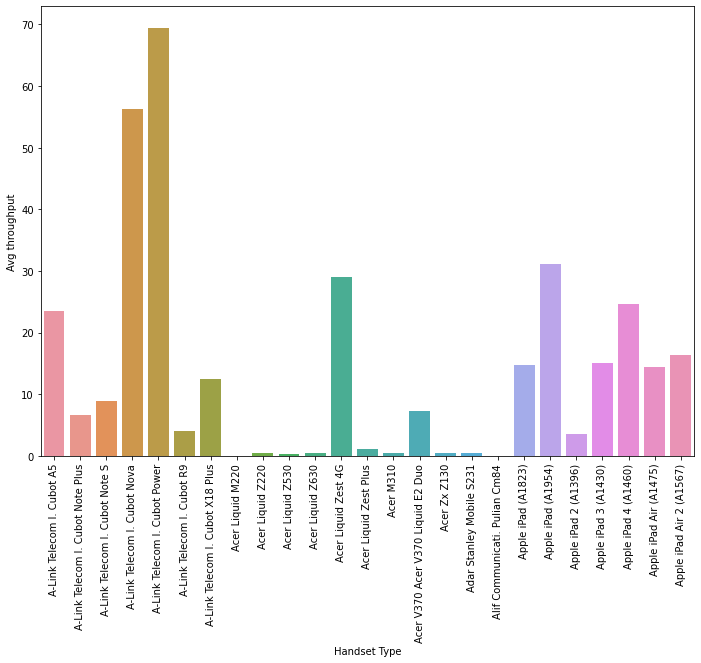

In [137]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
char = sns.barplot(x='Handset Type', y='Avg throughput', data=dfAvgThr.head(25))
char.set_xticklabels(char.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'TCP Retransmission per handset type')

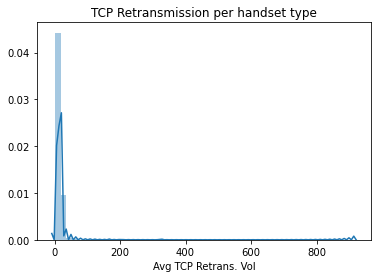

In [128]:
# Getting the TCP Retransmission per handset type
avgTcp = dfEA.groupby('Handset Type')['TCP Retrans. Vol (MegaBytes)'].mean()
dfAvgTcp = pd.DataFrame({'Handset Type': avgTcp.index, 'Avg TCP Retrans. Vol':avgTcp.values})

# plotting the top 15 handset sinces the devices are too many to represent well
sns.distplot(dfAvgTcp['Avg TCP Retrans. Vol']).set_title('TCP Retransmission per handset type')

In [129]:
dfAvgTcp.head()

,Handset Type,Avg TCP Retrans. Vol
0,A-Link Telecom I. Cubot A5,21.650430771
1,A-Link Telecom I. Cubot Note Plus,0.616213000
2,A-Link Telecom I. Cubot Note S,41.411731000
3,A-Link Telecom I. Cubot Nova,0.137170000
4,A-Link Telecom I. Cubot Power,0.008041000


[Text(0, 0, 'A-Link Telecom I. Cubot A5'),
 Text(0, 0, 'A-Link Telecom I. Cubot Note Plus'),
 Text(0, 0, 'A-Link Telecom I. Cubot Note S'),
 Text(0, 0, 'A-Link Telecom I. Cubot Nova'),
 Text(0, 0, 'A-Link Telecom I. Cubot Power'),
 Text(0, 0, 'A-Link Telecom I. Cubot R9'),
 Text(0, 0, 'A-Link Telecom I. Cubot X18 Plus'),
 Text(0, 0, 'Acer Liquid M220'),
 Text(0, 0, 'Acer Liquid Z220'),
 Text(0, 0, 'Acer Liquid Z530'),
 Text(0, 0, 'Acer Liquid Z630'),
 Text(0, 0, 'Acer Liquid Zest 4G'),
 Text(0, 0, 'Acer Liquid Zest Plus'),
 Text(0, 0, 'Acer M310'),
 Text(0, 0, 'Acer V370 Acer V370 Liquid E2 Duo'),
 Text(0, 0, 'Acer Zx Z130'),
 Text(0, 0, 'Adar Stanley Mobile S231'),
 Text(0, 0, 'Alif Communicati. Pulian Cm84'),
 Text(0, 0, 'Apple iPad (A1823)'),
 Text(0, 0, 'Apple iPad (A1954)'),
 Text(0, 0, 'Apple iPad 2 (A1396)'),
 Text(0, 0, 'Apple iPad 3 (A1430)'),
 Text(0, 0, 'Apple iPad 4 (A1460)'),
 Text(0, 0, 'Apple iPad Air (A1475)'),
 Text(0, 0, 'Apple iPad Air 2 (A1567)')]

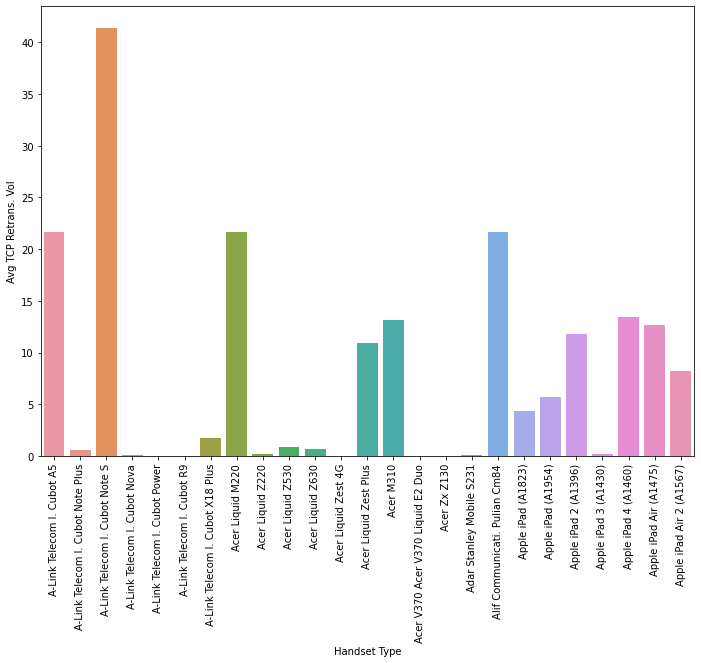

In [138]:
fig, ax = plt.subplots(figsize=a4_dims)
char2 = sns.barplot(x='Handset Type', y='Avg TCP Retrans. Vol', data=dfAvgTcp.head(25))
char2.set_xticklabels(char2.get_xticklabels(), rotation=90)

In [95]:
# Aggreagating the customer data and merging it into a dataframe 
dfAvgRtt = aggTotalDataEach(dfEA, 'Avg RTT')
dfAvgBea = aggTotalDataEach(dfEA, 'Avg Bearer TP (MegaBytes)')
dfAvgTcp = aggTotalDataEach(dfEA, 'TCP Retrans. Vol (MegaBytes)')
dfEA2 = pd.merge(dfAvgRtt, dfAvgBea, on='MSISDN/Number')
dfEA2 = pd.merge(dfEA2, dfAvgTcp, on='MSISDN/Number')
dfEA2

,MSISDN/Number,Avg RTT,Avg Bearer TP (MegaBytes),TCP Retrans. Vol (MegaBytes)
0,33662317023,96924.0,0.003,21.650430771
1,33660874265,64670.0,0.194,43.300861542
2,33683692867,54848.0,0.021,0.766339496
3,33698551167,46021.0,0.303,20.899822275
4,33761813523,37084.0,21.200,20.960468275
...,...,...,...,...
106851,33659493541,5.0,0.078,21.650430771
106852,33695045499,4.0,0.121,21.650430771
106853,33660204450,2.0,0.113,21.650430771
106854,33652982188,0.0,0.100,21.650430771


In [96]:
# dropping the identifier column
dfEAK = dfEA2.drop(['MSISDN/Number'], axis=1)

# Normalizing the variable columns
dfEAK['Avg RTT'] = np.transpose(normalize([np.array(dfEAK['Avg RTT'])]))
dfEAK['Avg Bearer TP (MegaBytes)'] = np.transpose(normalize([np.array(dfEAK['Avg Bearer TP (MegaBytes)'])]))
dfEAK['TCP Retrans. Vol (MegaBytes)'] = np.transpose(normalize([np.array(dfEAK['TCP Retrans. Vol (MegaBytes)'])]))

# running KMeans of the Normalized data
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(dfEAK)

In [97]:
kmeans3.cluster_centers_

array([[0.00202599, 0.00758989, 0.00094782],
       [0.0006319 , 0.00063426, 0.00041383],
       [0.00159368, 0.0096428 , 0.05795642]])

# Task 4 - Satisfaction Analysis

In [98]:
# Getting the Lowest cluster centers
EnScrLowClu = kmeans.cluster_centers_[0]
ExScrLowClu = kmeans3.cluster_centers_[0]

In [99]:
# finding the Eucalidean distance between the data points and the Lowest cluster centers (Engangement score)
EnScore = []
for row in dfNom[['Dur. (ms)', 'Total traffic', 'sessions frequency']].to_numpy():
    score = np.linalg.norm(row - EnScrLowClu)
    EnScore.append(score)

In [100]:
# finding the Eucalidean distance between the data points and the Lowest cluster centers (Experience score)
ExScore = []
for row in dfEAK[['Avg RTT', 'Avg Bearer TP (MegaBytes)', 'TCP Retrans. Vol (MegaBytes)']].to_numpy():
    score = np.linalg.norm(row - ExScrLowClu)
    ExScore.append(score)

In [101]:
# adding the Engagement Score to our Enganement analysis dataframe
dfNom['Engagement Score'] = np.transpose(np.array(EnScore))
dfNom['MSISDN/Number'] = dfEM['MSISDN/Number'] 

In [102]:
# adding the Experience Score to Experience analysis dataframe
dfEA2['Experience Score'] = np.transpose(np.array(ExScore))

In [103]:
# merging the Experience Analysis dataframe and Engagement analysis dataframe
dfSs = pd.merge(dfEA2, dfNom, on='MSISDN/Number')

In [104]:
# Avgeraging the Experience and Engagement Score to get the experience score
dfSs['Satisfaction Score'] = dfSs['Experience Score'] + dfSs['Engagement Score']
dfSs['Satisfaction Score'] = dfSs['Satisfaction Score']/2

In [105]:
# 10 highest Satisfaction score
dfSs.groupby('MSISDN/Number')['Satisfaction Score'].sum().nlargest(10)

MSISDN/Number
33626320676    8.502825280
33614892860    8.010492247
33625779332    8.004567032
33659725664    7.505681826
33760536639    7.004825710
33675877202    7.003379524
33667163239    6.013819745
33604515716    5.507843102
33760413819    5.504061791
33627080969    5.503452895
Name: Satisfaction Score, dtype: float64

In [106]:
dfSs.head()

,MSISDN/Number,Avg RTT,Avg Bearer TP (MegaBytes),TCP Retrans. Vol (MegaBytes),Experience Score,Dur. (ms),Total traffic,sessions frequency,Engagement Score,Satisfaction Score
0,33662317023,96924.0,0.003,21.650430771,0.426111572,0.002173084,0.000876985,1,0.001240401,0.213675986
1,33660874265,64670.0,0.194,43.300861542,0.283693494,0.003247226,0.003956876,2,1.000004164,0.641848829
2,33683692867,54848.0,0.021,0.766339496,0.240334559,0.000577764,0.002403113,1,0.000973922,0.120654241
3,33698551167,46021.0,0.303,20.899822275,0.201371102,0.002231931,0.002986547,2,1.000001112,0.600686107
4,33761813523,37084.0,21.200,20.960468275,0.161877765,0.004381559,0.010760937,4,3.000014947,1.580946356


In [107]:
# drop the identifier column and the two columns that make up the satisfaction score 
dfReg = dfSs.drop(['MSISDN/Number', 'Experience Score', 'Satisfaction Score'], axis=1)


### Regression Model

In [108]:
# Import the Regression Implemention from sklearn, xgboost and lightgbm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

#Import the metrics for testing model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Get the train data and its labels
X = dfReg.loc[:, 'Avg RTT': 'sessions frequency']
Y = dfReg["Engagement Score"]

# Split the dataset into train and test data for a more robust model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#defining the models
lr = LinearRegression()
rid = Ridge(alpha=1.0)
lass = Lasso(alpha=20.0, random_state=42)
lgradient = lgb.LGBMRegressor(random_state=3)
xgradient = xgb.XGBRegressor( max_depth=3,n_estimators=1000, min_child_weight=2, learning_rate=0.1,
                             objective='reg:squarederror', reg_alpha=1, reg_lambda=1,)

#training the models
lr = lr.fit(X_train, Y_train)
rid = rid.fit(X_train, Y_train)
lass = lass.fit(X_train, Y_train)
xgradient.fit(X_train, Y_train)
lgradient.fit(X_train, Y_train)

# prediction on the test set
lrPred = lr.predict(X_test)
ridPred = rid.predict(X_test)
lassPred = lass.predict(X_test)
xgradPred = xgradient.predict(X_test)
lgradPred = lgradient.predict(X_test)

# prediction metrics (Root Mean Squared)
print('Linear Regression: {}'.format(mean_squared_error(Y_test, lrPred)**0.5))
print('Rigde Regression: {}'.format(mean_squared_error(Y_test, ridPred)**0.5))
print('Lasso Regression: {}'.format(mean_squared_error(Y_test, lassPred)**0.5))
print('Extreme Gradient Boosting(xgb): {}'.format(mean_squared_error(Y_test, xgradPred)**0.5))
print('Light Gradient Boosting (lgb): {}'.format(mean_squared_error(Y_test, lgradPred)**0.5))

Linear Regression: 0.0005840845911132962
Rigde Regression: 0.0006090103672845811
Lasso Regression: 0.8153154268662977
Extreme Gradient Boosting(xgb): 0.016759899289699655
Light Gradient Boosting (lgb): 0.07440473646132685


### Engagement Score and Experience Score Kmeans

In [109]:
# Creating the dataframe for the kmeans
dfKmSs = pd.DataFrame()
dfKmSs['Experience Score'] = dfSs['Experience Score']
dfKmSs['Engagement Score'] = dfSs['Engagement Score']
dfKmSs

,Experience Score,Engagement Score
0,0.426111572,0.001240401
1,0.283693494,1.000004164
2,0.240334559,0.000973922
3,0.201371102,1.000001112
4,0.161877765,3.000014947
...,...,...
106851,0.007862590,0.001363997
106852,0.007861036,0.002506228
106853,0.007863796,0.000302095
106854,0.007866876,0.000438651


In [110]:
# Kmeans on the Experience score and Engagement score with 2 clusters
kmeansSs = KMeans(n_clusters=2, random_state=0).fit(dfKmSs)

In [111]:
kmeansSs.cluster_centers_

array([[7.31629696e-03, 1.11750883e-03],
       [6.35667456e-03, 1.44477867e+00]])

In [112]:
# appending the labelsto their correspoinding data
dfSs['kmeansLabels'] = np.transpose(kmeansSs.labels_)
dfSs.head()

,MSISDN/Number,Avg RTT,Avg Bearer TP (MegaBytes),TCP Retrans. Vol (MegaBytes),Experience Score,Dur. (ms),Total traffic,sessions frequency,Engagement Score,Satisfaction Score,kmeansLabels
0,33662317023,96924.0,0.003,21.650430771,0.426111572,0.002173084,0.000876985,1,0.001240401,0.213675986,0
1,33660874265,64670.0,0.194,43.300861542,0.283693494,0.003247226,0.003956876,2,1.000004164,0.641848829,1
2,33683692867,54848.0,0.021,0.766339496,0.240334559,0.000577764,0.002403113,1,0.000973922,0.120654241,0
3,33698551167,46021.0,0.303,20.899822275,0.201371102,0.002231931,0.002986547,2,1.000001112,0.600686107,1
4,33761813523,37084.0,21.200,20.960468275,0.161877765,0.004381559,0.010760937,4,3.000014947,1.580946356,1


In [113]:
# aggregating by average of the Engagement Score in each cluster
dfSs.groupby('kmeansLabels')['Engagement Score'].agg('mean')

kmeansLabels
0    0.001117509
1    1.444778672
Name: Engagement Score, dtype: float64

In [114]:
# aggregating by average of the Experience Score in each cluster
dfSs.groupby('kmeansLabels')['Experience Score'].agg('mean')

kmeansLabels
0    0.007316297
1    0.006356675
Name: Experience Score, dtype: float64

### Exporting the dataframe to MYSQL

In [115]:
### Exporting the dataframe to MYSQL
import sqlite3


dfKmSs['MSISDN/Number'] = dfSs['MSISDN/Number']
dfKmSs['Satisfaction Score'] = dfSs['Satisfaction Score']
dfKmSs.set_index('MSISDN/Number')

# creating the DB and Exporting the DataFrame
conn = sqlite3.connect('telco.sqlite')
dfKmSs.to_sql("all_scores", conn, index=False, if_exists="replace")

c:\users\gkkar\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [116]:
%load_ext sql
%sql sqlite:///telco.sqlite

In [117]:
%%sql

SELECT * FROM all_scores LIMIT 10;

 * sqlite:///telco.sqlite
Done.


Experience Score,Engagement Score,MSISDN/Number,Satisfaction Score
0.4261115721937051,0.0012404005377756517,33662317023,0.21367598636574037
0.2836934941668482,1.0000041635440322,33660874265,0.6418488288554403
0.24033455924566727,0.0009739220121005134,33683692867,0.12065424062888389
0.2013711021915288,1.0000011116275327,33698551167,0.6006861069095307
0.16187776459408226,3.000014946569547,33761813523,1.5809463555818146
0.15849395274112982,1.000003008792494,33668791629,0.5792484807668119
0.1186744589984771,0.0018827127925303757,33760941100,0.060278585895503736
0.11438453864099855,0.0014513468279815517,33606788933,0.05791794273449005
0.11180448643513502,0.0007861598988463706,33671816754,0.05629532316699069
0.11035960152720559,0.0010797908648701835,33781865588,0.055719696196037886
